In [79]:
#pip install pulsee
import numpy as np
import qutip as qt
import pulsee.plot as psplt
import operators as op # "import *" is bad Python practice, but simplest way to do some math
from operators import CLEAN_1000, CLEAN_0100, CLEAN_0010, CLEAN_0001, RHO_1000, RHO_0100, RHO_0010, RHO_0001, IDENTITY, Ix, Iy, Iz, Sx, Sy, Sz, IxSx, IxSy, IxSz, IySx, IySy, IySz, IzSx, IzSy, IzSz

In [80]:
HAD_I= op.Rx_I(np.pi) * op.Ry_I(np.pi / 2)
HAD_S= op.Rx_S(np.pi) * op.Ry_S(np.pi / 2)
spin_up = qt.states.basis(2, 0)  #|0>, |up>
spin_down = qt.states.basis(2, 1) #|1>, |down>
spin_plus = (1/np.sqrt(2)) * (qt.states.basis(2, 0) + qt.states.basis(2, 1)) #|+>
spin_minus = (1/np.sqrt(2)) * (qt.states.basis(2, 0) - qt.states.basis(2, 1)) #|->
#pseudo_CNOT_I = op.Rx_S(np.pi / 2) * op.UJ * op.Ry_S(np.pi / 2) #where the subscript indicates the control qubit.
#pseudo_CNOT_S = op.Rx_I(np.pi / 2) * op.UJ * op.Ry_I(np.pi / 2) #where the subscript indicates the control qubit.
id = qt.identity(2)
pi = np.pi

#NOTE THAT THE PHASE MUST BE CORRECT ON THE CNOT GATES
CNOT_I = op.Rz_I(np.pi / 2) * op.Rz_S(-np.pi / 2) * op.Rx_S(np.pi / 2) * op.UJ * op.Ry_S(np.pi / 2) #where the subscript indicates the control qubit.
CNOT_S=op.Rz_S(np.pi / 2) * op.Rz_I(-np.pi / 2) * op.Rx_I(np.pi / 2) * op.UJ * op.Ry_I(np.pi / 2) #where the subscript indicates the control qubit.

## This notebook closely follows the discussion in the following links:
This one has a more clear mathematical explantion:
https://www.jonvet.com/blog/math-behind-deutsch-algorithm 

This one has a better intro:
https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms


### Deutsch's algorithm is: given a function f(x), take a single bit as input and return a singe bit as output to determine if f(x) is constant or balanced. The reason this case is important is because the quantum solution can be solved with just 1 query while the classical solution involves 2 queries. This is the most simple case of a quantum speedup.

In [81]:
#First define the U_f gate. This encodes the function f(x).

U_f=IDENTITY        #Constant    This corresponds to f(x)=0
#U_f=CNOT_I         #Balanced    This corresponds to f(x)=x
U_f=op.Rx_S(np.pi)  #Constant    This corresponds to f(x)=1
#to determine if a function is constant or balanced, see first link.

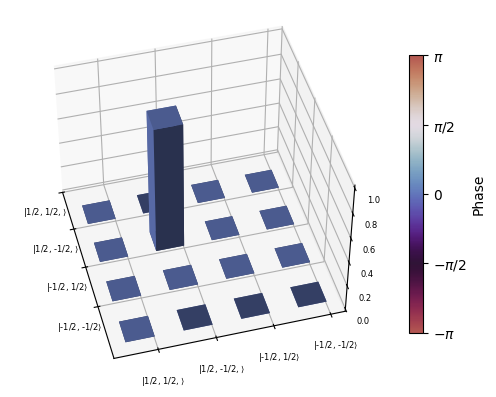

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [82]:
pi_0= CLEAN_0100
psplt.plot_complex_density_matrix(pi_0)
#01 state

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.25 -0.25  0.25 -0.25]
 [-0.25  0.25 -0.25  0.25]
 [ 0.25 -0.25  0.25 -0.25]
 [-0.25  0.25 -0.25  0.25]]

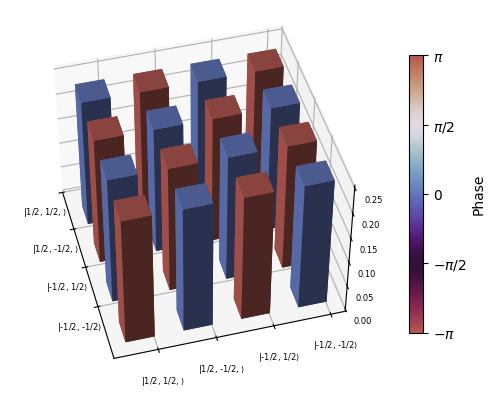

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [83]:
#|pi_1> simulation
pi_1_simulation=HAD_I * HAD_S * pi_0 * HAD_S.dag() * HAD_I.dag()
display(pi_1_simulation)
psplt.plot_complex_density_matrix(pi_1_simulation)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.25 -0.25  0.25 -0.25]
 [-0.25  0.25 -0.25  0.25]
 [ 0.25 -0.25  0.25 -0.25]
 [-0.25  0.25 -0.25  0.25]]

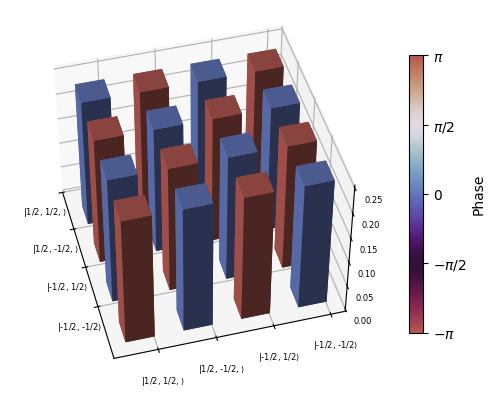

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.25 -0.25  0.25 -0.25]
 [-0.25  0.25 -0.25  0.25]
 [ 0.25 -0.25  0.25 -0.25]
 [-0.25  0.25 -0.25  0.25]]


In [84]:
#|pi_2> simulation
#The black circle represents the control qubit, and the cross within a circle represents the target qubit.
#U_f=op.Rx_S(np.pi) * CNOT_I
pi_2_simulation=U_f * pi_1_simulation * U_f.dag()
display(pi_2_simulation)
psplt.plot_complex_density_matrix(pi_2_simulation)
print(pi_2_simulation)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 5.00000000e-01 -5.00000000e-01 -2.74444113e-17  3.89411472e-17]
 [-5.00000000e-01  5.00000000e-01  3.89411472e-17 -5.04378831e-17]
 [-3.68712595e-17  3.92523115e-17  2.38105196e-18 -1.62588398e-17]
 [ 3.92523115e-17 -2.77555756e-17 -1.62588398e-17 -1.14967359e-17]]

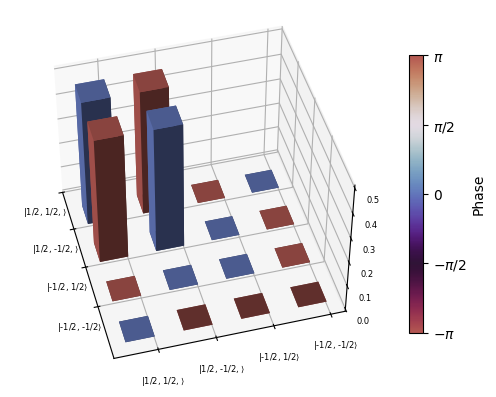

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [85]:
#|pi_3> simulation
#The black circle represents the control qubit, and the cross within a circle represents the target qubit.
pi_3_simulation=HAD_I * pi_2_simulation * HAD_I.dag()
display(pi_3_simulation)
psplt.plot_complex_density_matrix(pi_3_simulation)

In [86]:
#Measurment
spin_I_measurement_up=qt.tensor(spin_up,id)*qt.tensor(spin_up,id).dag()
#spin_S_measurement_up=qt.tensor(id,spin_up)*qt.tensor(id,spin_up).dag()
#spin_I_measurement_down=qt.tensor(spin_down,id)*qt.tensor(spin_down,id).dag()
#spin_S_measurement_down=qt.tensor(id,spin_down)*qt.tensor(id,spin_down).dag()
result=(pi_3_simulation*spin_I_measurement_up).tr()
print("result =", result)

result = 0.9999999999999998


In [87]:
if result > .99:
    print("The probability of measuring Spin I as up is 100%. The input is constant.")
    
if result < .0001:
    print("The probability of measuring Spin I as up is nearly 0%. The input is balanced.")

The probability of measuring Spin I as up is 100%. The input is constant.


In [88]:
#Another way to check

# Example: 2-spin density matrix (4x4)
rho = pi_3_simulation

# Reduced density matrix for spin I (first spin)
rho_I = rho.ptrace(0)

# Probability of spin-I being up
P_up = rho_I[0, 0].real  # Real part of diagonal element
print(f"Probability of spin-I being up: {P_up}")

Probability of spin-I being up: 0.9999999999999998


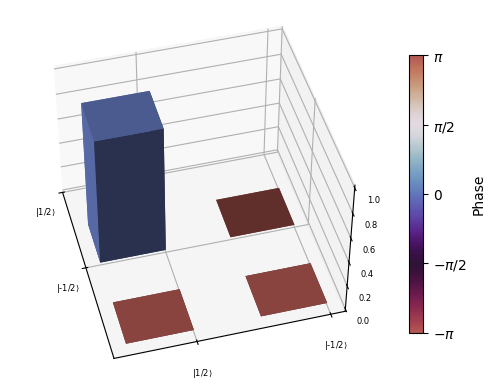

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [89]:
psplt.plot_complex_density_matrix(rho_I)

In [90]:
0.25*op.IDENTITY - 0.50*op.Sx + 0.50*op.Iz - 1.00*op.IzSx

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.5 -0.5  0.   0. ]
 [-0.5  0.5  0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]]

In [91]:
(0.25*op.IDENTITY- 0.50*op.Sx - 0.50*op.Iz + 1.00*op.IzSx)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.5 -0.5]
 [ 0.   0.  -0.5  0.5]]